In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math 



In [77]:
# local path to data
data_claims_p = '../data/claims_data.csv'
data_final_p = '../data/final/'

# sharepoint path to data
# import requests
# username = 'your_username'
# password = 'your_password'

# data_final_sp = 'https://standardbank.sharepoint.com/:f:/r/sites/DataHackathonSU/Shared%20Documents/telematics_data?csf=1&web=1&e=lLK83c'
# data_claims_sp = 'https://standardbank.sharepoint.com/:x:/r/sites/DataHackathonSU/Shared%20Documents/claims_data.csv?d=wd7ea2811007641e8b1336c81e15e895f&csf=1&web=1&e=JDSqqP'

# data_claims = requests.get(data_claims_sp)#, auth=(username, password))
# print(data_claims)

In [23]:
data_claims = pd.read_csv(data_claims_p)
print("Size & Shape: ", data_claims.size, data_claims.shape )
print("\nHead: ", data_claims.head())
print("\n dTypes: ", data_claims.dtypes)

Size & Shape:  327 (109, 3)

Head:     vehicleid  number of claims  total claims cost
0   92624443                 6          389723.07
1   87055861                 3          209466.98
2  111082600                 3           76122.98
3   96215479                 2           56622.41
4  104804470                 2          206623.44

 dTypes:  vehicleid              int64
number of claims       int64
total claims cost    float64
dtype: object


In [30]:
no_claims = data_claims['total claims cost'].isnull().sum() # no of vehicles with no claims cost out of 109. 
print("Percentage of vehicles with no claims cost: ", no_claims/109*100, "% ", no_claims, "vehicles")

Percentage of vehicles with no claims cost:  77.06422018348624 %  84 vehicles


(array([1., 1., 0., 3., 2., 1., 4., 0., 1., 1., 4., 0., 0., 0., 0., 0., 0.,
        0., 2., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1.]),
 array([  7153.    ,  17237.1435,  27321.287 ,  37405.4305,  47489.574 ,
         57573.7175,  67657.861 ,  77742.0045,  87826.148 ,  97910.2915,
        107994.435 , 118078.5785, 128162.722 , 138246.8655, 148331.009 ,
        158415.1525, 168499.296 , 178583.4395, 188667.583 , 198751.7265,
        208835.87  , 218920.0135, 229004.157 , 239088.3005, 249172.444 ,
        259256.5875, 269340.731 , 279424.8745, 289509.018 , 299593.1615,
        309677.305 , 319761.4485, 329845.592 , 339929.7355, 350013.879 ,
        360098.0225, 370182.166 , 380266.3095, 390350.453 , 400434.5965,
        410518.74  ]),
 <BarContainer object of 40 artists>)

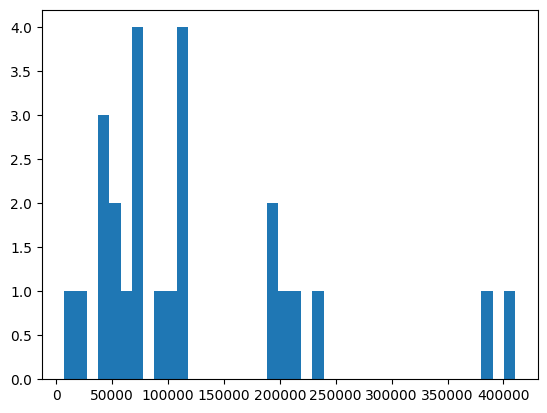

In [35]:
plt.hist(data_claims['total claims cost'], bins=40)

(array([1., 0., 0., 1., 2., 1., 0., 2., 1., 0., 0., 1., 1., 0., 2., 2., 1.,
        0., 0., 0., 1., 0., 1., 1., 1., 2., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  7153.    ,  11186.6574,  15220.3148,  19253.9722,  23287.6296,
         27321.287 ,  31354.9444,  35388.6018,  39422.2592,  43455.9166,
         47489.574 ,  51523.2314,  55556.8888,  59590.5462,  63624.2036,
         67657.861 ,  71691.5184,  75725.1758,  79758.8332,  83792.4906,
         87826.148 ,  91859.8054,  95893.4628,  99927.1202, 103960.7776,
        107994.435 , 112028.0924, 116061.7498, 120095.4072, 124129.0646,
        128162.722 , 132196.3794, 136230.0368, 140263.6942, 144297.3516,
        148331.009 , 152364.6664, 15639

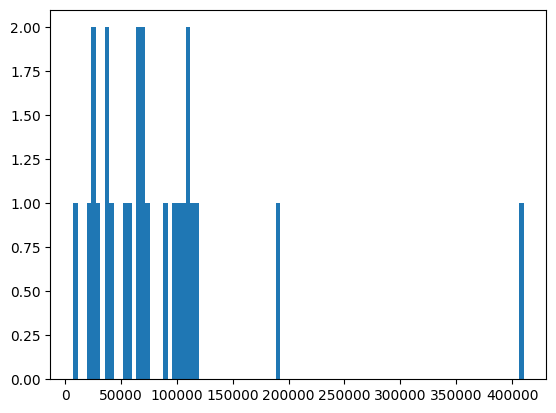

In [54]:

average_cost_per_claim = data_claims["total claims cost"] / data_claims["number of claims"]
#print(average_cost_per_claim)

plt.hist(average_cost_per_claim, bins=100)

In [51]:
data_claims['average_per_claim'] = average_cost_per_claim; 
data_claims.head()

,vehicleid,number of claims,total claims cost,average_per_claim
0,92624443,6,389723.07,64953.845000
1,87055861,3,209466.98,69822.326667
2,111082600,3,76122.98,25374.326667
3,96215479,2,56622.41,28311.205000
4,104804470,2,206623.44,103311.720000


In [73]:
vehicleid = data_claims["vehicleid"]
print("Vehicle (all / uniques): ", vehicleid.size, vehicleid.unique().size)
vehicleid.head()

Vehicle (all / uniques):  109 109


0     92624443
1     87055861
2    111082600
3     96215479
4    104804470
Name: vehicleid, dtype: int64

In [81]:
car_data = []
for x in vehicleid:
    try:
        car_data.append(pd.read_csv(f"{data_final_p}{x}.csv"))
    except:
        print(f"No file for : {x}.csv")
print(car_data)
car_data[0].head()

No file for : 98951195.csv
No file for : 140259212.csv
No file for : 257728155.csv
[      partition_date        id  vehicleid  coordinate_latitude  \
0         2022-01-01  92624443   92624443           -34.005232   
1         2022-01-01  92624443   92624443           -34.005202   
2         2022-01-01  92624443   92624443           -34.005233   
3         2022-01-01  92624443   92624443           -34.005233   
4         2022-01-01  92624443   92624443           -34.005230   
...              ...       ...        ...                  ...   
82009     2022-04-01  92624443   92624443           -33.997320   
82010     2022-04-01  92624443   92624443           -33.997590   
82011     2022-04-01  92624443   92624443           -33.999452   
82012     2022-04-01  92624443   92624443           -34.001742   
82013     2022-04-01  92624443   92624443           -34.001438   

       coordinate_longitude            timestamp  heading ignitionState  \
0                 18.559999  2022-01-01 05:05:48

,partition_date,id,vehicleid,coordinate_latitude,coordinate_longitude,timestamp,heading,ignitionState,odometer,speed,...,z_accel,altitude,SP_CODE,SP_NAME,MP_NAME,MN_NAME,DC_NAME,PR_NAME,created_ts,country_name
0,2022-01-01,92624443,92624443,-34.005232,18.559999,2022-01-01 05:05:48,0,ON,168794430.0,0,...,0.07,26.0,199036009.0,Sweet Home,Philippi,City of Cape Town,City of Cape Town,Western Cape,2022-01-01 05:06:21.526634,South Africa
1,2022-01-01,92624443,92624443,-34.005202,18.560008,2022-01-01 05:05:56,15,ON,168794430.0,0,...,0.09,26.0,199036009.0,Sweet Home,Philippi,City of Cape Town,City of Cape Town,Western Cape,2022-01-01 05:06:21.526634,South Africa
2,2022-01-01,92624443,92624443,-34.005233,18.559988,2022-01-01 05:05:57,218,ON,168794430.0,0,...,0.09,25.0,199036009.0,Sweet Home,Philippi,City of Cape Town,City of Cape Town,Western Cape,2022-01-01 05:07:39.520309,South Africa
3,2022-01-01,92624443,92624443,-34.005233,18.559991,2022-01-01 05:08:57,242,ON,168794430.0,0,...,0.09,25.0,199036009.0,Sweet Home,Philippi,City of Cape Town,City of Cape Town,Western Cape,2022-01-01 05:09:32.020682,South Africa
4,2022-01-01,92624443,92624443,-34.005230,18.559984,2022-01-01 05:11:57,108,ON,168794430.0,0,...,0.09,24.0,199036009.0,Sweet Home,Philippi,City of Cape Town,City of Cape Town,Western Cape,2022-01-01 05:12:40.028725,South Africa
